## Customer Service Study
### Introduction
Shelter inc, is a non governmental organisation that works to reduce the number of people who are homeless and stop others from loosing their homes by providing services that help clients retain permanent housing.

#### This study was geared to find out how well the staff treat prospective clients with respect and dignity in terms of

1. The time spent from the time a prospective client reaches out to the agency and the first time the agency calls back the client.
2. The total time spent going through the pre-approval processes.
3. Number of touch points from the first time a prospective participant contacts the agency until the agency communicates with the participant whether they will receive services or not.

### Datasets
The customer service study uses three data sets
1. #### Reception dataset
This data set contains information about reception callers, some of the variables include,Retrieved Call from Voice Mail,Receptionist Referred Caller to One Door,datetime_called,datetime_Returned, phone number, 
2. #### One door dataset 
This dataset contains information about one door callers, main variables include 'date_time_called,'date_time_Retrieved', 'date_time1', 'date_time2', 'date_time3','Second_date_Call_Time', 'Third_date_Call_Time','Fourth_date_Call_Time', 'Case Number', 'Entered into HMIS One Door'and 'Call Not Appropriate for One Door'
3. #### One door Clarity dataset
This dataset contains callers who were reffered to programs by one door, the main variables looked at are Case Number, recommendation,Project Start Date,Project Exit Date,First Attempt Date,Second Attempt Date,Third Attempt Date,Date Met with Applicant, Meeting Outcome,Decision date,decision Notes.

### Importing required packages

In [75]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

from datetime import datetime
import statistics as stat
from scipy.stats.stats import pearsonr

import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')


### Data Loading , exploration and analysis
#### Reception Data

In [76]:
#bringing in the reception dataset
recep=pd.read_excel('Claire_Recep_9sept.xlsx')
recep=pd.DataFrame(recep)
recep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296 entries, 0 to 2295
Data columns (total 9 columns):
datetime_called                             2258 non-null object
Business Hours                              41 non-null object
Phone #                                     1870 non-null object
Has Phone                                   2296 non-null object
Retrieved Call from Voice Mal               2296 non-null bool
Receptionist Referred Caller to One Door    2296 non-null bool
Receptionist Referred Caller to             54 non-null object
datetime_Returned                           84 non-null object
Time diff in minutes                        84 non-null float64
dtypes: bool(2), float64(1), object(6)
memory usage: 130.1+ KB


In [77]:
#make phone the index
recep=recep.set_index('Phone #')

In [78]:
#drop unwanted columns
recep=recep.drop(columns=['Time diff in minutes','Receptionist Referred Caller to' ])
#change data types
recep['datetime_called']=recep['datetime_called'].astype('datetime64')
recep['datetime_Returned']=recep['datetime_Returned'].astype('datetime64')
recep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2296 entries, 980-267-6571 to nan
Data columns (total 6 columns):
datetime_called                             2258 non-null datetime64[ns]
Business Hours                              41 non-null object
Has Phone                                   2296 non-null object
Retrieved Call from Voice Mal               2296 non-null bool
Receptionist Referred Caller to One Door    2296 non-null bool
datetime_Returned                           84 non-null datetime64[ns]
dtypes: bool(2), datetime64[ns](2), object(2)
memory usage: 94.2+ KB


In [79]:
#creating the time difference columns
recep['diff']=recep['datetime_Returned'].sub(recep['datetime_called'])

In [80]:
#change time diff to minutes
recep['diff']=recep['diff'].astype('timedelta64[m]')
recep.min() #get min values of the dataset

datetime_called                             2018-06-01 01:33:00
Has Phone                                                    NO
Retrieved Call from Voice Mal                             False
Receptionist Referred Caller to One Door                  False
datetime_Returned                           2018-06-04 14:15:00
diff                                                          0
dtype: object

From the above statistics, I realised that their are some negative values, this shows that there were data entry errors. *(Voice mails were retrieved before the client called)* Iam going to run the statistics again minus records with data entry errors.

In [81]:
recep1=recep[(recep['diff']>=0) &(recep['Retrieved Call from Voice Mal']== True)]
recep1.describe(), stat.mode(recep1['diff'])#statistics without errors

(              diff
 count    39.000000
 mean    220.333333
 std     552.102028
 min       0.000000
 25%       2.500000
 50%       7.000000
 75%      36.500000
 max    2936.000000, 1.0)

From the above we can see that most people recieve information about calling one door from the receptionist with in a minute of their call.<br>
On average it takes the receptionist 220 minutes to return a call.
#### below are a few more statistics from excel

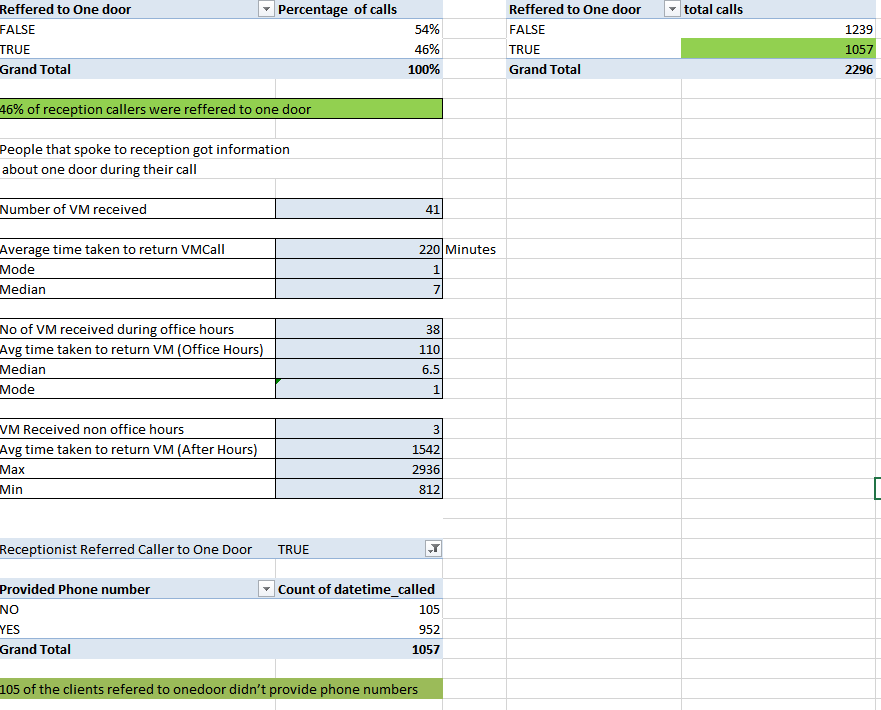

### One door data

In [82]:
df=pd.read_excel("Herlinda2.xlsx") #read in the data
oned=pd.DataFrame(df)
oned.columns #look at columns

Index(['date_time_called', 'date_time_Retrieved', 'date_time1',
       'retrieve_diff', 'Made Contact 1?', 'time_diff_1', 'date_time2',
       'Made Contact 2?', 'date_time3', 'Made Contact 3?',
       'Second_date_Call_Time', 'Second Call Notes', 'Third_date_Call_Time',
       'Third Call Notes', 'Fourth_date_Call_Time', 'Fourth Call Notes',
       'datelastcontacted', 'Time diff2', 'Decision Date1', 'Case Number',
       'Phone #', 'Second Phone #  or Ext', 'ID', 'Entered into HMIS One Door',
       'Call Not Appropriate for One Door', 'Call More Appropriate for',
       ' Considered for', 'Forwarded/Referred Call to', 'Notes',
       'Further Call Notes'],
      dtype='object')

In [83]:
#drop columns
oned2= oned.drop(columns=['Made Contact 1?', 'time_diff_1', 'Made Contact 2?', 'Made Contact 3?',
       'Second Call Notes', 'Third Call Notes', 'Fourth Call Notes', 'datelastcontacted', 'Decision Date1', 
       'Second Phone #  or Ext', 'Call More Appropriate for','Time diff2','retrieve_diff',
       ' Considered for', 'Forwarded/Referred Call to', 'Notes',
       'Further Call Notes'])
oned2.columns

Index(['date_time_called', 'date_time_Retrieved', 'date_time1', 'date_time2',
       'date_time3', 'Second_date_Call_Time', 'Third_date_Call_Time',
       'Fourth_date_Call_Time', 'Case Number', 'Phone #', 'ID',
       'Entered into HMIS One Door', 'Call Not Appropriate for One Door'],
      dtype='object')

In [84]:
#change data types
oned2['date_time_called']= pd.to_datetime(oned2['date_time_called'])
oned2['date_time1']= pd.to_datetime(oned2['date_time1'])
oned2['date_time_Retrieved']= pd.to_datetime(oned2['date_time_Retrieved'])
oned2['Second_date_Call_Time']= pd.to_datetime(oned2['Second_date_Call_Time'])
oned2['date_time2']= pd.to_datetime(oned2['date_time2'])
oned2['date_time3']= pd.to_datetime(oned2['date_time3'])
oned2['Third_date_Call_Time']= pd.to_datetime(oned2['Third_date_Call_Time'])
oned2['Fourth_date_Call_Time']= pd.to_datetime(oned2['Fourth_date_Call_Time'])
oned2.ID= oned2['ID'].astype(str)

In [85]:
oned2[oned2.date_time_called.isnull()] #looking at the null values 

,date_time_called,date_time_Retrieved,date_time1,date_time2,date_time3,Second_date_Call_Time,Third_date_Call_Time,Fourth_date_Call_Time,Case Number,Phone #,ID,Entered into HMIS One Door,Call Not Appropriate for One Door
2171,NaT,NaT,2018-07-10 18:21:00,2018-07-12 11:53:00,2018-08-20 11:00:00,2018-08-20 08:27:00,2018-08-20 11:14:00,NaT,NaN,510-927-6379,2717,False,False
2172,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,2701,False,False


In [86]:
#drop Nans from date time called 
oned2.dropna(subset=['date_time_called'],axis=0, inplace=True)

In [87]:
oned2.iloc[:,0:6].head()#show first 5 of a selected columns

,date_time_called,date_time_Retrieved,date_time1,date_time2,date_time3,Second_date_Call_Time
0,2018-08-01 13:18:00,2018-08-01 15:18:00,2018-08-01 15:20:00,2018-08-02 11:27:00,2018-08-02 12:49:00,NaT
1,2018-06-13 10:49:00,2018-06-13 12:36:00,2018-06-13 15:38:00,2018-06-21 10:50:00,NaT,2018-06-14 11:48:00
2,2018-06-08 09:40:00,2018-06-08 09:59:00,2018-06-08 14:30:00,2018-06-11 11:18:00,2018-06-11 16:28:00,2018-06-08 14:22:00
3,2018-08-15 12:27:00,NaT,2018-08-15 12:27:00,NaT,NaT,NaT
4,2018-08-09 10:31:00,NaT,2018-08-09 10:31:00,NaT,NaT,NaT


In [88]:
#add a column for the last date contacted
def lastdate(x):
    '''
    funtion takes in a dataset looks for the last valid number
    of each available column and then returns a list 
    of last valid numbers
    
    '''
    if x.last_valid_index() is None:
        return None
    else:
        return x[x.last_valid_index()]
    
oned2['Last_contact']= oned2[oned2.columns.drop(['Case Number', 'Phone #', 'ID',
       'Entered into HMIS One Door', 'Call Not Appropriate for One Door'])].apply(lastdate,axis=1)
oned2.head(2) #show a few rows

,date_time_called,date_time_Retrieved,date_time1,date_time2,date_time3,Second_date_Call_Time,Third_date_Call_Time,Fourth_date_Call_Time,Case Number,Phone #,ID,Entered into HMIS One Door,Call Not Appropriate for One Door,Last_contact
0,2018-08-01 13:18:00,2018-08-01 15:18:00,2018-08-01 15:20:00,2018-08-02 11:27:00,2018-08-02 12:49:00,NaT,NaT,NaT,518664384,925-864-4235,3281,True,False,2018-08-02 12:49:00
1,2018-06-13 10:49:00,2018-06-13 12:36:00,2018-06-13 15:38:00,2018-06-21 10:50:00,NaT,2018-06-14 11:48:00,2018-06-20 11:20:00,NaT,949CEF41C,925-848-9127,2098,False,False,2018-06-20 11:20:00


#### Getting the average difference between the time the clients called the agency and the time the responsible employees were able to return their calls
* Diff1 --diff between date the client called and the date of voice mail retrieval by one door
* Diff2 --diff between date of first contact and first call back
* Diff3 --diff between date of first contact and last contact


In [89]:
oned2['diff1']= oned2['date_time_Retrieved'].sub(oned2['date_time_called'], axis=0)
oned2['diff2']= oned2['date_time1'].sub(oned2['date_time_called'], axis=0)
oned2['diff3']= oned2['Last_contact'].sub(oned2['date_time_called'], axis=0)

In [90]:
#changing the diff columns to minutes
oned2['diff1']  = oned2['diff1'].astype('timedelta64[m]') 
oned2['diff2']  = oned2['diff2'].astype('timedelta64[m]')
oned2['diff3']  = oned2['diff3'].astype('timedelta64[m]')

#### Looking at the statistics of the table

In [91]:
oned2.describe()

,diff1,diff2,diff3
count,2164.000000,2147.000000,2171.000000
mean,615.587800,2211.983698,6659.815292
std,1069.916078,2174.096379,14488.464415
min,-1333.000000,0.000000,-4076.000000
25%,78.000000,1250.000000,1291.000000
50%,179.000000,1476.000000,1738.000000
75%,904.000000,2955.500000,4562.000000
max,10165.000000,59065.000000,132723.000000


similar to the receptionist dataset. From the above statistics, I realised that their are some negative values, this shows that there were data entry errors. (Voice mails were retrieved before the client called) Iam going to run the statistics again minus records with data entry errors. its important to note that diff2, didnt have that problem so I shall only deal with diff3 and diff1

In [109]:
#creating sebsets of the data with only differences columns
#diff1
diffs =oned2[['diff1','Case Number']]
diffs[diffs['diff1']>=0].describe()

,diff1
count,2117.000000
mean,639.965045
std,1068.281624
min,0.000000
25%,84.000000
50%,188.000000
75%,946.000000
max,10165.000000


From the above we can see that the mean of the 2117 calls was 639 minutes and maximmum minutes were 10,165<br>
Now looking at the statistics of diff3 with out errors

In [110]:
#diff3
diff_3 =oned2[['diff3','Case Number']]
diff_3[diff_3['diff3']>=0].describe()

,diff3
count,2160.000000
mean,6696.433796
std,14515.981451
min,0.000000
25%,1294.750000
50%,1748.500000
75%,4576.500000
max,132723.000000


From the above we can see that the mean of the 2160  calls was 6696 minutes and maximmum minutes were 132,723

### Taking a closer look at the time difference between, first contact and last contact.

In [120]:
#ignore negative Values
diff3_Postive =oned2[oned2.diff3 >= 0]
diff3_Postive.shape

(2160, 17)

In [121]:
#send it to excel
diff3_Postive.to_csv('positiveDiff3.csv')
#bring it back in
posDiff3=pd.read_csv('positiveDiff3.csv')
posDiff3= pd.DataFrame(posDiff3)

### Create categorical variables from diff3 and a histogram to show distributions of the variable

In [122]:
bins = np.linspace(min(posDiff3['diff3']),max(posDiff3['diff3']),num=4)#create bins
posDiff3["levels"] = pd.cut(posDiff3['diff3'],bins,labels= ['Low','Medium','High'])#divide dataset
posDiff3.groupby("levels").size(), bins #show bin sises and bins

(levels
 Low       2078
 Medium      57
 High        17
 dtype: int64, array([     0.,  44241.,  88482., 132723.]))

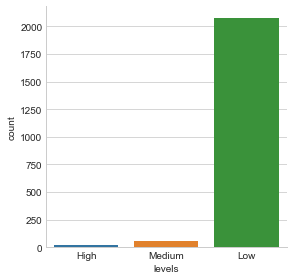

In [123]:
sb.factorplot('levels', order=['High','Medium','Low'], data= posDiff3, kind='count')

From the above visual, it shows that most callers took less than 44,241 minutes to get a referal to a program

### The Clarity dataset

In [112]:
#Bringing in the clarity data
hmis=pd.read_excel('claritydata1.xlsx')
hmis.columns

Index(['Case Number', 'recommendation', ' Case Manager Assigned',
       'Registration status', 'Full Name', 'Project Start Date',
       'Project Exit Date', 'First Attempt Date', 'First Attempt Outcome',
       'Second Attempt Date', 'Second Attempt Outcome', 'Third Attempt Date',
       'Third Attempt Outcome', ' Appointment Date', 'Date Met with Applicant',
       'Meeting Outcome', ' Meeting Outcome Date (For Manager Only)',
       'Decision date', 'decision Notes', 'Decision Status',
       'Time_diff In Days'],
      dtype='object')

In [113]:
#drop unwanted columns
hmis=hmis.drop(columns=[' Case Manager Assigned','Registration status', 'Full Name','First Attempt Outcome',
                    'Decision date', 'decision Notes', ' Appointment Date','Second Attempt Outcome',
                        'Third Attempt Outcome', 'Time_diff In Days','Meeting Outcome'])
hmis.shape

In [114]:
#make case number the index
hmis=hmis.set_index(['Case Number'])
hmis.head()

,recommendation,Project Start Date,Project Exit Date,First Attempt Date,Second Attempt Date,Third Attempt Date,Date Met with Applicant,Meeting Outcome Date (For Manager Only),Decision Status
Case Number,,,,,,,,,
029772534,HousingWORKS!,2018-07-24,2018-07-27,2018-08-03,NaT,NaT,2018-08-23,2018-08-23,Approved
430266134,HousingWORKS!,2018-08-27,2018-08-31,2018-09-05,2018-09-06,NaT,NaT,NaT,UN Known
518664384,Client will call back,2018-08-02,NaT,NaT,NaT,NaT,NaT,NaT,UN Known
579582158,AB109,2018-07-05,2018-07-05,2018-07-06,NaT,NaT,NaT,NaT,Refused Services
704181107,NaN,2018-07-31,2018-08-07,NaT,NaT,NaT,NaT,NaT,UN Known


In [115]:
hmis.info() #look at the datatypes and all

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, 029772534 to FED2A9724
Data columns (total 9 columns):
recommendation                              544 non-null object
Project Start Date                          548 non-null datetime64[ns]
Project Exit Date                           431 non-null datetime64[ns]
First Attempt Date                          208 non-null datetime64[ns]
Second Attempt Date                         98 non-null datetime64[ns]
Third Attempt Date                          55 non-null datetime64[ns]
Date Met with Applicant                     61 non-null datetime64[ns]
 Meeting Outcome Date (For Manager Only)    147 non-null datetime64[ns]
Decision Status                             548 non-null object
dtypes: datetime64[ns](7), object(2)
memory usage: 42.8+ KB


In [116]:
# write a formula that creates the dicision date, 
def decision(x):
    if x.last_valid_index()is None:
        return None
    else:
        return x[x.last_valid_index()]


hmis['decision_date']=hmis[hmis.columns.drop(['recommendation','Decision Status'])].apply(decision,axis=1)
hmis.shape

(548, 10)

In [117]:
#create the difference columns
hmis['Final_diff']= hmis['decision_date'].sub(hmis['Project Start Date'])
#send hmis data to excel
hmis.to_excel('hmis.xlsx')

In [118]:
hmis.describe()

,Final_diff
count,548
mean,8 days 05:54:44.671532
std,13 days 02:17:04.380292
min,0 days 00:00:00
25%,0 days 00:00:00
50%,0 days 00:00:00
75%,12 days 00:00:00
max,69 days 00:00:00


From the above we can see that it takes on average 8 days for the clients to get a decision from the time of referal by one door.
#### I will now join the tables together for an all round analysis